Make and train the model

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load the data


In [11]:
#Train data
npz = np.load('../../data/preprocessed/data_train.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

#Validation data
npz = np.load('../../data/preprocessed/data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

#Test data
npz = np.load('../../data/preprocessed/data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

Make the model

In [4]:
#Define the model
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 32 filter
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 64 filter
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 128 filter
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'), #Convolutional layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [10]:
BATCH_SIZE = 32 
MAX_EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
record = model.fit(
    train_inputs,
    train_targets,
    batch_size=BATCH_SIZE,
    epochs=MAX_EPOCHS,
    validation_data=(validation_inputs, validation_targets),
    steps_per_epoch=int(np.ceil(len(train_inputs)) / float(32)),
    validation_steps=int(np.ceil(len(validation_inputs)) / float(32)),
    callbacks=[early_stopping],
    verbose=2
    )

Epoch 1/10
1593/1593 - 31s - loss: 0.0678 - accuracy: 0.9739 - val_loss: 0.5075 - val_accuracy: 0.8970 - 31s/epoch - 19ms/step
Epoch 2/10
1593/1593 - 29s - loss: 0.0627 - accuracy: 0.9765 - val_loss: 0.5269 - val_accuracy: 0.8946 - 29s/epoch - 18ms/step
Epoch 3/10
1593/1593 - 32s - loss: 0.0592 - accuracy: 0.9780 - val_loss: 0.5158 - val_accuracy: 0.8954 - 32s/epoch - 20ms/step
Epoch 4/10
1593/1593 - 31s - loss: 0.0605 - accuracy: 0.9773 - val_loss: 0.5151 - val_accuracy: 0.8916 - 31s/epoch - 19ms/step
Epoch 5/10
1593/1593 - 32s - loss: 0.0554 - accuracy: 0.9798 - val_loss: 0.5708 - val_accuracy: 0.8880 - 32s/epoch - 20ms/step
Epoch 6/10
1593/1593 - 27s - loss: 0.0551 - accuracy: 0.9797 - val_loss: 0.5957 - val_accuracy: 0.8916 - 27s/epoch - 17ms/step


Explore the train

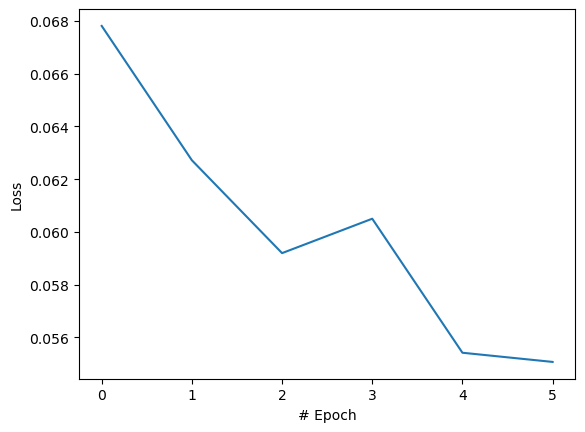

In [12]:
#Show the loss between epochs 
plt.plot(record.history['loss'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.show()

Evaluate model

In [13]:
model.evaluate(test_inputs, test_targets)

313/313 [==============================] - 2s 5ms/step - loss: 0.6652 - accuracy: 0.8865


[0.6652379631996155, 0.8865000009536743]

Save the model

In [14]:
model.save('./trained_model/fashion_mnist_cnn_model.h5')